<a href="https://colab.research.google.com/github/Achyuta-Harshavardhan/Outliers/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Naivye Bayes Classifier (Not Sensitive)
2. SVM (Not Sensitive)
3. **Linear Regression (Sensitive)**
4. **Logistic Regression (Sensitive)**
5. Decision Tree Regressor or Classifier (Not Sensitive)
6. Ensemble(RF,XGboost,GB (Not Sensitive)
7. KNN (Not Sensitive)
8. **Kmeans (Sensitive)**
9. **Hierarichal (Sensitive)**
10. **PCA (Sensitive)**
11. **Neural Networks (Sensitive)**

In [1]:
# Import all the necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

In [2]:
# Read the data from CSV file
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/outliers/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'No of passenger')

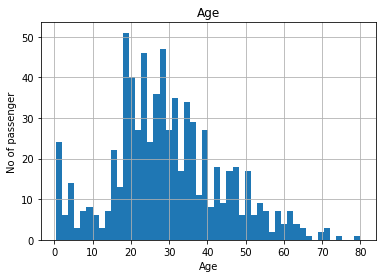

In [3]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

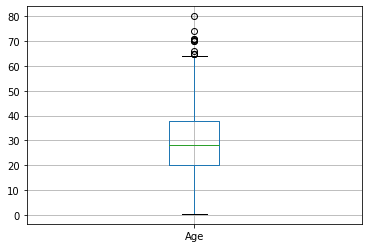

In [4]:
figure = df.boxplot(column="Age")

#If the feature is normally distributed then we need to calculate the upper boundary and the lower boundary which differentiate the outliers

In [5]:
upper_boundary = df['Age'].mean() + 3* df['Age'].std()
lower_boundary = df['Age'].mean() - 3* df['Age'].std()

print("Mean: ",df['Age'].mean())
print('Lower Boundary: ',lower_boundary)
print('Upper Boundary: ',upper_boundary)

Mean:  29.69911764705882
Lower Boundary:  -13.88037434994331
Upper Boundary:  73.27860964406095


# If the feature is skewed

Text(0, 0.5, 'No of passenger')

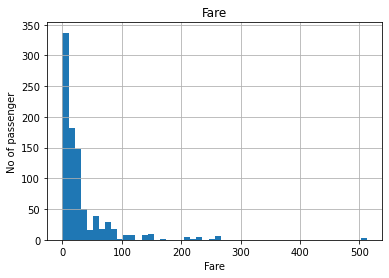

In [6]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

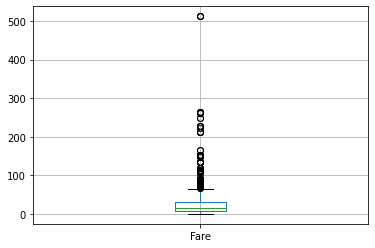

In [7]:
df.boxplot(column="Fare")

In [8]:
IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
print("IQR: ",IQR)

IQR:  23.0896


In [9]:
# In case of Skewed we need to consider extereme outliers that is multiply by 3
lower_bridge = df.Fare.quantile(0.25)-(IQR*3)
upper_bridge = df.Fare.quantile(0.75)+(IQR*3)
print('Lower Bridge: ',lower_bridge)
print('Upper Bridge: ',upper_bridge)

Lower Bridge:  -61.358399999999996
Upper Bridge:  100.2688


In [10]:
df1 = df.copy()

In [11]:
df1.loc[df1['Age']>=73,'Age'] = 73

In [12]:
df1.loc[df1['Fare']>=100,'Fare']= 100

In [13]:
x = df1[['Age','Fare']].fillna(0)
y = df1['Survived']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [15]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)

In [16]:
print(accuracy_score(y_test,pred))

0.6492537313432836
